In [11]:
%matplotlib inline
from lightjob.db import DB, SUCCESS, RUNNING
from lightjob.cli import load_db
import pandas as pd
from collections import defaultdict
import json
import matplotlib.pyplot as plt

In [2]:
db = load_db()

In [49]:
where = 'jobset77'

In [50]:
nb = 0
stats = defaultdict(list)
for j in db.jobs_with(state=SUCCESS, where=where):
    if 'life' not in j:
        continue
    for moment in j['life']:
        if moment['state'] == RUNNING:
            start = moment['dt']
        if moment['state'] == SUCCESS:
            end = moment['dt']
    delta = pd.to_datetime(end) - pd.to_datetime(start)
    print('from {} to {}. time spent on job : {}'.format(start, end, delta))
    for k, v in j['stats']['training']['avg_loss_train_fix_details'].items():
        stats[k].append(v)
    print(j['stats']['training']['avg_loss_train_fix_details']['90per'])
    print(j['stats']['training']['avg_loss_train_fix'])
    nb += 1
print(nb)

from 2016-10-23T23:37:13.027045 to 2016-10-24T02:23:41.576769. time spent on job : 0 days 02:46:28.549724
27.4754086553
25.4743142993
from 2016-10-23T23:38:54.849807 to 2016-10-24T01:50:42.361036. time spent on job : 0 days 02:11:47.511229
55.1199456281
54.47614955
from 2016-10-23T23:39:11.892453 to 2016-10-24T09:40:24.468035. time spent on job : 0 days 10:01:12.575582
3.01215613257
3.00966084762
from 2016-10-23T23:39:26.595391 to 2016-10-24T03:36:51.529035. time spent on job : 0 days 03:57:24.933644
12.5995171515
11.7230972968
from 2016-10-23T23:39:57.950441 to 2016-10-24T02:42:06.594400. time spent on job : 0 days 03:02:08.643959
11.6219802678
11.7158317015
from 2016-10-23T23:39:15.956106 to 2016-10-23T23:51:06.969051. time spent on job : 0 days 00:11:51.012945
41.2008594349
nan
from 2016-10-23T23:38:59.880455 to 2016-10-24T09:40:29.958558. time spent on job : 0 days 10:01:30.078103
4.79621085764
4.60468453649
from 2016-10-23T23:40:37.830241 to 2016-10-24T02:17:02.491892. time spent 

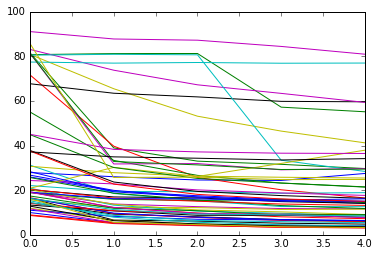

In [51]:
df = pd.DataFrame(stats, columns=['10per', '30per', '50per', '70per', '90per' ])
X = df.values
for  x in X:
    plt.plot(x)